<a href="https://colab.research.google.com/github/mostafacii25/Deep_Learning_MNIST_Classification_and_Boston_House_Price_Prediction/blob/main/Deep_Learning_MNIST_Classification_and_Boston_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras
from keras import datasets

In [ ]:
len(dir(keras.datasets))

17

In [ ]:
dir(keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

## ***Classification des Chiffres Manuscrits à l'Aide de Réseaux de Neurones Convolutifs***

# Lecture des données mnist à l'aide de la fonction mnist.load_data

In [ ]:
from keras import datasets

(x1, y1), (x2, y2) = datasets.mnist.load_data()

In [ ]:
print('x1.shape = ',x1.shape, '\ny1.shape = ', y1.shape)
print('x2.shape = ',x2.shape, '\ny2.shape = ', y2.shape)

x1.shape =  (60000, 28, 28) 
y1.shape =  (60000,)
x2.shape =  (10000, 28, 28) 
y2.shape =  (10000,)


In [ ]:
m1, m2 = x1.shape[0], x2.shape[0]
n = x1.shape[1]
print('m1 =', m1, "\nm2=", m2)
print('n =', n)

m1 = 60000 
m2= 10000
n = 28


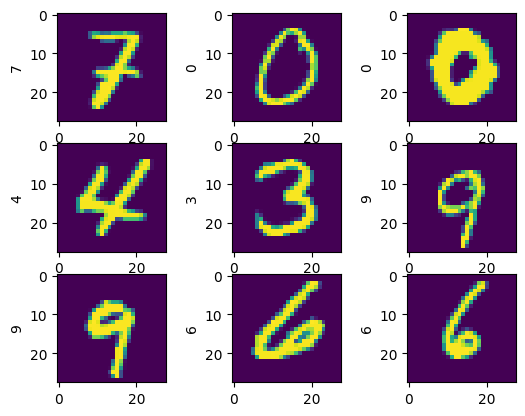

In [ ]:
# Visualisation d'exemples choisis aléatoires
import matplotlib.pyplot as plt
import random
plt.figure()
for i in range(9):
  plt.subplot(3, 3, i+1)
  j = random.randint(0, m1-1)
  plt.imshow(x1[j])
  plt.ylabel(y1[j])
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Reshape des données pour qu'elles soient adaptées à des images 28x28
x1 = x1.reshape(-1, n, n, 1)
x2 = x2.reshape(-1, n, n, 1)

# Réseaux de Neurones Convolutifs (CNN)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Création du modèle avec des couches de convolution

modele_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(n, n, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
modele_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

In [ ]:
modele_cnn.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history = modele_cnn.fit(x1, y1, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 90s 94ms/step - loss: 0.4166 - accuracy: 0.9211
Epoch 2/10
938/938 [==============================] - 81s 86ms/step - loss: 0.0835 - accuracy: 0.9745
Epoch 3/10
938/938 [==============================] - 92s 98ms/step - loss: 0.0623 - accuracy: 0.9810
Epoch 4/10
938/938 [==============================] - 72s 77ms/step - loss: 0.0528 - accuracy: 0.9838
Epoch 5/10
938/938 [==============================] - 111s 119ms/step - loss: 0.0462 - accuracy: 0.9854
Epoch 6/10
938/938 [==============================] - 78s 83ms/step - loss: 0.0435 - accuracy: 0.9864
Epoch 7/10
938/938 [==============================] - 84s 90ms/step - loss: 0.0374 - accuracy: 0.9886
Epoch 8/10
938/938 [==============================] - 64s 69ms/step - loss: 0.0360 - accuracy: 0.9884
Epoch 9/10
938/938 [==============================] - 67s 71ms/step - loss: 0.0299 - accuracy: 0.9904
Epoch 10/10
938/938 [==============================] - 61s 65ms/step - loss: 0.0

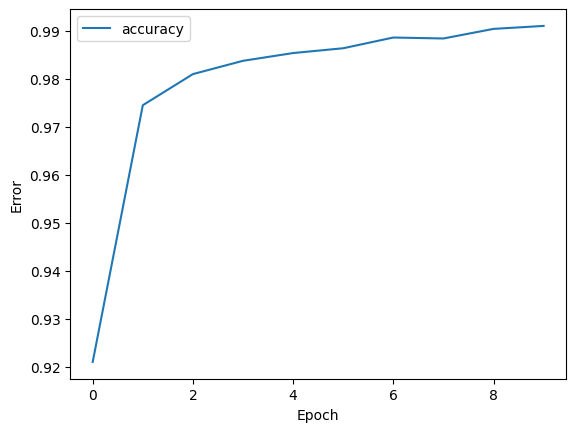

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
modele_cnn.evaluate(x2, y2)

313/313 [==============================] - 3s 10ms/step - loss: 0.0706 - accuracy: 0.9818


[0.07059002667665482, 0.9818000197410583]

In [ ]:
#Matrice de confusion
import numpy as np

y2hat = modele_cnn.predict(x2)
y2hat = np.argmax(y2hat, axis = 1)

mc = tf.math.confusion_matrix(y2, y2hat)
print('Matrie de confusion:\n', mc)

313/313 [==============================] - 4s 13ms/step
Matrie de confusion:
 tf.Tensor(
[[ 962    1    6    0    3    0    2    3    0    3]
 [   6 1127    0    0    0    0    0    2    0    0]
 [   1    1 1010    2    0    0    0   17    0    1]
 [   0    1    3  995    0    3    0    6    2    0]
 [   0    0    2    0  968    0    1    2    1    8]
 [   2    4    1    6    0  867    2    2    5    3]
 [   4    3    2    0    9    6  927    0    6    1]
 [   0    4    5    1    0    0    0 1015    0    3]
 [   1    0    3    3    0    1    0    4  957    5]
 [   1    1    0    0    3    2    0    4    8  990]], shape=(10, 10), dtype=int32)


## ***Prédiction des Prix des Maisons à Boston avec un Réseau de Neurones***

# Lecture des données du Boston Housing

In [ ]:
from keras import datasets

# Charger les données
(x_train, y_train), (x_test, y_test) = datasets.boston_housing.load_data()

In [ ]:
# Enregistrer les données dans un fichier
dataa=np.savez('boston_housing_data.npz', x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

In [ ]:
#Convertissez le fichier .npz en un fichier .mat (format MATLAB)
import scipy.io

dataa = np.load('boston_housing_data.npz')
scipy.io.savemat('boston_housing_data.mat', dataa)

In [ ]:
print('x_train.shape = ',x_train.shape, '\ny_train.shape = ', y_train.shape)
print('x_test.shape = ',x_test.shape, '\ny_test.shape = ', y_test.shape)

x_train.shape =  (404, 13) 
y_train.shape =  (404,)
x_test.shape =  (102, 13) 
y_test.shape =  (102,)


In [ ]:
m1, n = x_train.shape
m2 = x_test.shape[0]

print('m1 =', m1, "\nm2 =", m2)
print('n =', n)

m1 = 404 
m2 = 102
n = 13


# Réseaux de Neurones à 5 Couches Cachées

---



In [ ]:
from keras.models import Sequential
from keras.layers import Dense

modele_regression = keras.models.Sequential([
Dense(512, input_shape = (n,), activation = 'relu'),
Dense(256, activation = 'relu'),
Dense(128, activation = 'relu'),
Dense(64, activation = 'relu'),
Dense(32, activation = 'relu'),
Dense(1)                         # Pas besoin de spécifier une activation pour la régression
])

modele_regression.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               7168      
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 181,761
Trainable params: 181,761
Non-tr

In [ ]:
dir(keras.optimizers)

In [ ]:

modele_regression.compile( loss = 'mean_squared_error',                         ## Utilisation de l'erreur quadratique moyenne pour la régression
                           optimizer = 'adam',
                           metrics = ['mse','mae']                              # Utiliser la même métrique que la fonction de perte
)


In [ ]:
history = modele_regression.fit(x_train,y_train,batch_size=256,epochs=5000)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
2/2 [==============================] - 0s 22ms/step - loss: 1.0807 - mse: 1.0807 - mae: 0.7439
Epoch 2502/5000
2/2 [==============================] - 0s 24ms/step - loss: 0.9131 - mse: 0.9131 - mae: 0.6537
Epoch 2503/5000
2/2 [==============================] - 0s 18ms/step - loss: 0.8729 - mse: 0.8729 - mae: 0.6436
Epoch 2504/5000
2/2 [==============================] - 0s 25ms/step - loss: 0.8607 - mse: 0.8607 - mae: 0.6370
Epoch 2505/5000
2/2 [==============================] - 0s 22ms/step - loss: 0.7637 - mse: 0.7637 - mae: 0.5992
Epoch 2506/5000
2/2 [==============================] - 0s 21ms/step - loss: 0.8787 - mse: 0.8787 - mae: 0.6373
Epoch 2507/5000
2/2 [==============================] - 0s 27ms/step - loss: 1.2066 - mse: 1.2066 - mae: 0.8250
Epoch 2508/5000
2/2 [==============================] - 0s 28ms/step - loss: 0.7894 - mse: 0.7894 - mae: 0.6032
Epoch 2509/5000
2/2 [=============================

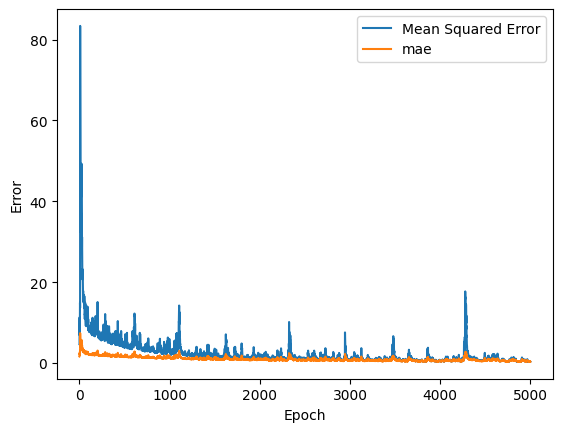

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mse'],label='Mean Squared Error')
plt.plot(history.history['mae'],label='mae')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
loss=modele_regression.evaluate(x_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 26.0376 - mse: 26.0376 - mae: 3.1348


In [ ]:
import numpy as np

y2hat = modele_regression.predict(x_test)
ypred=np.reshape(y2hat, (m2,))
i = [45, 18, 25, 65, 78, 1, 5]

print('sortie réel    : ',y_test[i])
print('sortie estimé  : ',[f'{value:.1f}' for value in ypred[i]])

4/4 [==============================] - 0s 4ms/step
sortie réel    :  [29.6 19.1 23.  21.9 35.4 18.8 24.5]
sortie estimé  :  ['31.7', '21.3', '21.7', '21.5', '38.4', '18.7', '21.0']
